Insurance Expense prediction using Linear regression

In [1]:
# importing libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as mlt
import seaborn as sns 

In [2]:
# Loading dateset

ins_data = pd.read_csv('insurance.csv')
ins_data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# information of dataset

ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Shape of the dataset

ins_data.shape

(1338, 7)

In [5]:
# checking for null values

ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Exploratary data analysis

<AxesSubplot:ylabel='sex'>

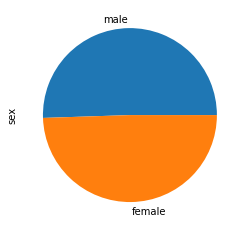

In [6]:
# counter distribution of age using countplot

df = ins_data['sex'].value_counts()
df.plot(kind = 'pie')

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

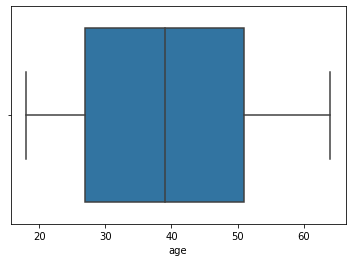

In [7]:
# Distribution of age using boxplot
 
df = ins_data['age']
sns.boxplot(df)

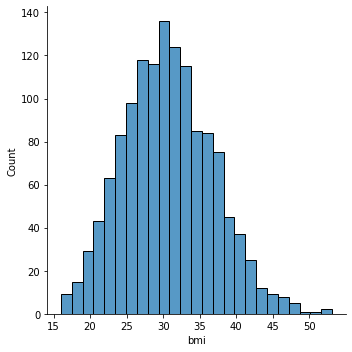

In [8]:
# density distribution of bmi

df = ins_data['bmi']
sns.displot(df)

<AxesSubplot:>

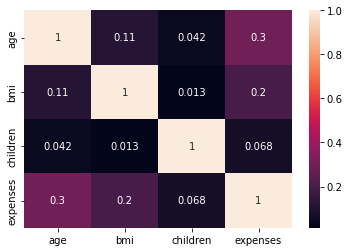

In [9]:
# correlation between each columns

sns.heatmap(ins_data.corr(), annot=True)

In [10]:
# Converting categorical variables into numeric

ins = ins_data

## Label encoding for sex column 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x = ins['sex']

ins['sex'] = le.fit_transform(x)

ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [11]:
## Label encoding for smoker column 

x = ins['smoker']

ins['smoker'] = le.fit_transform(x)

ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [12]:
## dummy encoding for region column

ins = pd.get_dummies(ins, columns=['region'], drop_first=True)
ins

,age,sex,bmi,children,smoker,expenses,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,1,0,0
1334,18,0,31.9,0,0,2205.98,0,0,0
1335,18,0,36.9,0,0,1629.83,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,1


In [36]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int32  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int32  
 5   expenses          1338 non-null   float64
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int32(2), int64(2), uint8(3)
memory usage: 56.3 KB


All data is in numeric data type 

# Model building

In [14]:
from sklearn.model_selection import train_test_split

In [81]:
# Declaring x and y: (features and label)

X = ins.drop("expenses", axis=1)
Y = ins['expenses']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Standard = sc.fit_transform(X)

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(X_Standard,Y, test_size=0.2, random_state=20)

In [71]:
xtrain.shape

(1070, 8)

In [72]:
xtest.shape

(268, 8)

In [73]:
ytrain.shape

(1070,)

In [74]:
ytest.shape

(268,)

In [75]:
from sklearn.linear_model import LinearRegression
L_model = LinearRegression()

In [76]:
L_model.fit(xtrain, ytrain)

LinearRegression()

In [77]:
y_prediction = L_model.predict(xtest)

In [78]:
y_prediction[:5]

array([13305.67455264,  9983.61120982, 11682.24373697, 18032.37551645,
        4740.7997512 ])

In [79]:
ytest[:5]

698     10976.25
520     25656.58
1144     9630.40
908     15170.07
559      1646.43
Name: expenses, dtype: float64

In [80]:
L_model.score(xtest, ytest)

0.7959358662345163